<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/6_wine_0816_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')

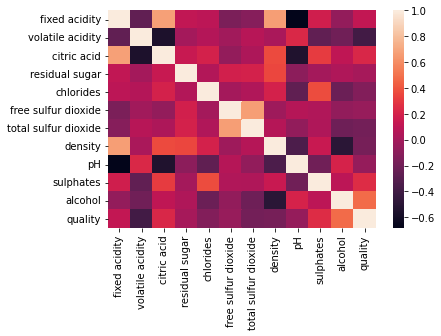

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = red_wine.corr()
sns.heatmap(corr, xticklabels = corr.columns.values,
           yticklabels=corr.columns.values)

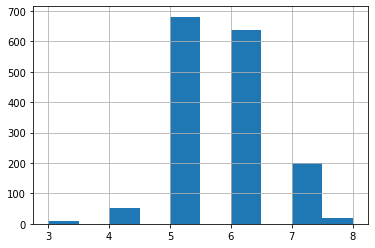

In [3]:
red_wine['quality'].hist()

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
from sklearn.model_selection import train_test_split

X = red_wine.iloc[:,0:11]
y = red_wine['quality']

le = LabelEncoder()
y = le.fit_transform(y)
  

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.33,
                                                  random_state = 42)

y_train_cat = to_categorical(y_train,6)
y_test_cat = to_categorical(y_test, 6)

In [7]:
# Scale to [0, 1]
# max_ = df_train.max(axis=0)
# min_ = df_train.min(axis=0)
# df_train = (df_train - min_) / (max_ - min_)
# df_valid = (df_valid - min_) / (max_ - min_)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [10]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [11]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[11]),
    # layers.Dropout(rate=0.5),
    # layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dropout(rate=0.5),
    layers.Dense(32, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dropout(rate=0.5),
    layers.Dense(6, activation='softmax'),
])

In [13]:
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=20, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [15]:
history = model.fit(
    X_train, y_train_cat,
    validation_data = (X_test,y_test_cat),
    batch_size=128,
    # callbacks=[early_stopping],
    epochs=100,
)

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 1.7981 - accuracy: 0.2418 - val_loss: 1.7021 - val_accuracy: 0.4034
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 1.6511 - accuracy: 0.3968 - val_loss: 1.5769 - val_accuracy: 0.4034
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 1.4873 - accuracy: 0.4006 - val_loss: 1.4024 - val_accuracy: 0.4129
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 1.3171 - accuracy: 0.4519 - val_loss: 1.2902 - val_accuracy: 0.5341
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 1.2343 - accuracy: 0.5135 - val_loss: 1.2463 - val_accuracy: 0.5170
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 1.1889 - accuracy: 0.5434 - val_loss: 1.2037 - val_accuracy: 0.5530
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 1.1510 - accuracy: 0.5387 - val_loss: 1.1763 - val_accuracy: 0.5455
Epoch 8/100
9/9 [=========

# 2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 12,070
Trainable params: 12,070
Non-trainable params: 0
_________________________________________________________________


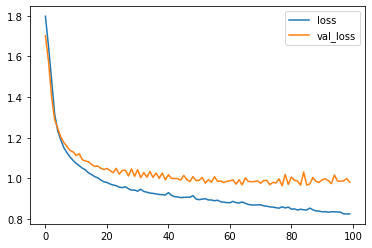

In [17]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[0:100,['loss','val_loss']].plot()

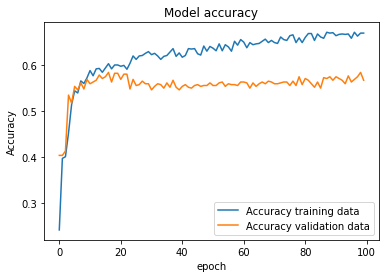

In [18]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [19]:
# mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)

# print(mse_value)

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred[0]

array([0.00380576, 0.01565272, 0.4581032 , 0.49123368, 0.02958525,
       0.00161934], dtype=float32)

In [22]:
y_test

array([3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 4, 0, 2, 2, 3, 4, 2, 4, 5, 2, 2, 3,
       2, 3, 3, 3, 4, 3, 2, 3, 2, 2, 3, 2, 3, 2, 4, 2, 1, 3, 2, 2, 4, 2,
       2, 3, 4, 3, 2, 3, 2, 2, 2, 4, 3, 3, 3, 2, 2, 2, 2, 4, 2, 3, 3, 2,
       3, 2, 3, 2, 3, 1, 3, 3, 3, 2, 5, 2, 3, 3, 2, 3, 2, 3, 3, 4, 2, 3,
       4, 1, 4, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4, 3, 4, 3, 2, 3, 2,
       5, 2, 3, 2, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 4, 3, 5, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 2,
       3, 2, 2, 3, 3, 3, 4, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3, 2, 4, 3, 4, 3,
       3, 2, 2, 3, 1, 3, 2, 4, 2, 2, 1, 2, 4, 3, 2, 3, 3, 4, 3, 2, 2, 3,
       2, 4, 2, 3, 3, 2, 4, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 3, 2, 3, 3,
       3, 3, 3, 4, 1, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 4, 2, 3, 3, 3, 2, 1,
       3, 4, 3, 4, 2, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 4, 2, 2, 3, 2, 4,
       2, 3, 1, 3, 3, 5, 3, 2, 2, 3, 2, 4, 3, 3, 2,

In [24]:
# from sklearn.metrics import r2_score

# r2_score(y_test, y_pred)